# To run ONCE during session

In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
participants = []
all_SSwithin_bias = []
all_TTwithin_bias = []

all_SSacross_bias = []
all_STacross_bias = []
all_TSacross_bias = []
all_TTacross_bias = []

In [5]:
data_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/all_data/'
dir_ext = [f for f in listdir(data_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = data_dir + i
    pt_dir_lst.append(pt_dir)

## Edit for each participant

In [654]:
pt_dir = pt_dir_lst[36]
pt_dir

IndexError: list index out of range

In [637]:
encoding_files = []
tempdist_files = []
srcmem_files = []
for pt in pt_dir:
    pt_files = [f for f in listdir(pt_dir) if isfile(join(pt_dir, f))]

for a in pt_files:
    if a[-4:] == '.csv' and 'encoding' in a:
        encoding_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'temp_dist' in a:
        tempdist_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'src_mem' in a:
        srcmem_files.append(pt_dir + '/' + a)

In [638]:
#1 add in column for pt number and run number
#2 concat all the run csvs for each test
#3 drop NAs
len(pt_files)

48

In [639]:
tempdf = []
rn1 = tempdist_files[0]
dt1 = pd.DataFrame(pd.read_csv(rn1, header = 0))
dt1.columns = dt1.columns.str.replace(".", "_")
dt1['run_num'] = '1'
pt_num = dt1.participant[2]
type(dt1)
tempdf.append(dt1)
for b in tempdist_files[1:]:
    dt = pd.DataFrame(pd.read_csv(b, header = 0))
    dt.columns = dt.columns.str.replace(".", "_")
    dt['run_num'] = b[-32]
    tempdf.append(dt)
allTD_df = pd.concat(tempdf)
allTD_df = allTD_df.dropna(subset=['context_num', 'contexts_pics', 'objects_pics'])
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/'
os.makedirs(pt_dt, exist_ok=True)  
#allTD_df.to_csv(pt_dt+"%s_ptsummary.csv"%pt_num, index = True, header = True )

In [640]:
allTD_df

,context_num,context_type,context_shock,cntxt_trialnum,shock_object,us,shock_time,contexts_pics,condition,objects_pics,...,text_4_started,session,participant,date,expName,psychopyVersion,frameRate,Unnamed: 55,run_num,Unnamed: 51
3,7.0,THREAT,None,2.0,None,0.0,None,Scenes_selected/scene_043.jpg,within_threat1,new_obs/1_312.jpg,...,NaN,1.0,75.0,2023-10-17_17h08.29.780,temp_dist.py,2022.2.1,59.949199,NaN,1,NaN
4,5.0,SAFE,None,5.0,None,0.0,None,Scenes_selected/scene_006.jpg,across_safe1,new_obs/1_270.jpg,...,NaN,1.0,75.0,2023-10-17_17h08.29.780,temp_dist.py,2022.2.1,59.949199,NaN,1,NaN
5,13.0,THREAT,None,5.0,None,0.0,None,Scenes_selected/scene_004.jpg,across_threat1,new_obs/1_533.jpg,...,NaN,1.0,75.0,2023-10-17_17h08.29.780,temp_dist.py,2022.2.1,59.949199,NaN,1,NaN
6,14.0,SAFE,None,5.0,None,0.0,None,Scenes_selected/scene_065.jpg,across_safe1,new_obs/object_168.jpg,...,NaN,1.0,75.0,2023-10-17_17h08.29.780,temp_dist.py,2022.2.1,59.949199,NaN,1,NaN
7,3.0,SAFE,post,5.0,None,0.0,None,Scenes_selected/scene_064.jpg,across_safe1,new_obs/1_354.jpg,...,NaN,1.0,75.0,2023-10-17_17h08.29.780,temp_dist.py,2022.2.1,59.949199,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,11.0,SAFE,None,5.0,None,0.0,None,Scenes_selected/scene_066.jpg,across_safe1,new_obs/object_507.jpg,...,NaN,1.0,75.0,2023-10-17_18h26.37.279,temp_dist5.py,2022.2.1,60.124120,NaN,5,NaN
33,5.0,THREAT,None,2.0,None,0.0,None,Scenes_selected/scene_088.jpg,within_threat1,new_obs/1_261.jpg,...,NaN,1.0,75.0,2023-10-17_18h26.37.279,temp_dist5.py,2022.2.1,60.124120,NaN,5,NaN
34,3.0,THREAT,None,2.0,None,0.0,None,Scenes_selected/scene_097.jpeg,within_threat1,new_obs/1_130.jpg,...,NaN,1.0,75.0,2023-10-17_18h26.37.279,temp_dist5.py,2022.2.1,60.124120,NaN,5,NaN
35,0.0,SAFE,None,2.0,None,0.0,None,Scenes_selected/scene_010.jpg,within_safe1,new_obs/1_108.jpg,...,NaN,1.0,75.0,2023-10-17_18h26.37.279,temp_dist5.py,2022.2.1,60.124120,NaN,5,NaN


In [641]:
very_close = []
close = []
far = []
very_far = []

dt = pd.read_csv(pt_dt+"%s_ptsummary.csv"%pt_num)

In [642]:
shrt_df = pd.DataFrame({ 
                        'contxt1': dt.context_type,
                        'contxt2': dt.context_type2,
                        'context_shock':dt.context_shock,
                        'context_shock2':dt.context_shock2,
                        'cond1': dt.condition,
                        'cond2': dt.condition2,
                        'resp': dt.key_resp_keys,
                        'rt': dt.key_resp_rt})

In [643]:
within_TT = []
within_SS = []

across_TT = []
across_TS = []
across_ST = []
across_SS = []

rt_within_TT = []
rt_within_SS = []

rt_across_TT = []
rt_across_TS = []
rt_across_ST = []
rt_across_SS = []

for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'within_threat1' and shrt_df.cond2[index] == 'within_threat2':
        within_TT.append(resp_dt[index])
        rt_within_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'within_safe1' and shrt_df.cond2[index] == 'within_safe2':
        within_SS.append(resp_dt[index])
        rt_within_SS.append(resp_rt[index])
        
for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp
    resp_rt = shrt_df.rt
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_TT.append(resp_dt[index])
        rt_across_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_TS.append(resp_dt[index])
        rt_across_TS.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_ST.append(resp_dt[index])
        rt_across_ST.append(resp_rt[index])
    
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post':
        across_SS.append(resp_dt[index])
        rt_across_SS.append(resp_rt[index])

In [644]:
len(across_ST)

20

In [645]:
SSwithin_close = []
SSwithin_far = []

TTwithin_close = []
TTwithin_far = []

for a in within_SS:
    if a == 1 or a == 2:
        SSwithin_close.append(1)
    if a == 3 or a == 4:
        SSwithin_far.append(0)
        
for a in within_TT:
    if a == 1 or a == 2:
        TTwithin_close.append(1)
    if a == 3 or a == 4:
        TTwithin_far.append(0)

In [646]:
SSacross_close = []
SSacross_far = []

STacross_close = []
STacross_far = []

TSacross_close = []
TSacross_far = []

TTacross_close = []
TTacross_far = []

for c in across_SS:
    if c == 1 or c == 2:
        SSacross_close.append(1)
    if c == 3 or c == 4:
        SSacross_far.append(0)
        
for c in across_TT:
    if c == 1 or c == 2:
        TTacross_close.append(1)
    if c == 3 or c == 4:
        TTacross_far.append(0)
        
for c in across_ST:
    if c == 1 or c == 2:
        STacross_close.append(1)
    if c == 3 or c == 4:
        STacross_far.append(0)
        
for c in across_TS:
    if c == 1 or c == 2:
        TSacross_close.append(1)
    if c == 3 or c == 4:
        TSacross_far.append(0)


In [647]:
len(within_TT)

45

In [648]:
SSwithin_bias = (sum(SSwithin_close))/(len(within_SS))
all_SSwithin_bias.append(SSwithin_bias)
TTwithin_bias = (sum(TTwithin_close))/(len(within_TT))
all_TTwithin_bias.append(TTwithin_bias)

SSacross_bias = (sum(SSacross_close))/(len(across_SS))
all_SSacross_bias.append(SSacross_bias)
STacross_bias = (sum(STacross_close))/(len(across_ST))
all_STacross_bias.append(STacross_bias)
TSacross_bias = (sum(TSacross_close))/(len(across_TS))
all_TSacross_bias.append(TSacross_bias)
TTacross_bias = (sum(TTacross_close))/(len(across_TT))
all_TTacross_bias.append(TTacross_bias)

In [649]:
TTacross_bias

0.65

### rep_graph

In [650]:
W_safe_bias = np.mean(all_SSwithin_bias)
W_threat_bias = np.mean(all_TTwithin_bias)
A_safe_bias = np.mean(all_SSacross_bias)
A_threat_bias = np.mean(all_TTacross_bias)

In [651]:
print(W_safe_bias)
print(W_threat_bias)
print(A_safe_bias)
print(A_threat_bias)

0.5867568895431233
0.6246042581555029
0.41111111111111115
0.3972222222222222


Text(0.5, 1.0, '75.0_Within context temporal bias')

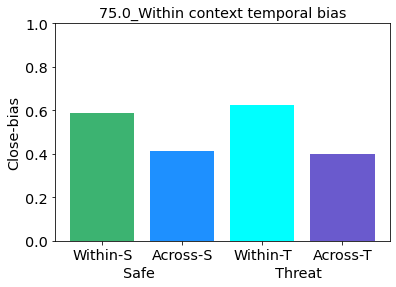

In [652]:
x = ['Within-S', 'Across-S','Within-T', 'Across-T']
y = [W_safe_bias, A_safe_bias, W_threat_bias, A_threat_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['mediumseagreen','dodgerblue', 'cyan','slateblue'], align='center', data=None)
plt.ylim(0, 1)
plt.xlabel("Safe                          Threat", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Within context temporal bias"%pt_num, fontsize = "x-large")

In [653]:
binarydf = pd.DataFrame({"Safe_within_bias":all_SSwithin_bias,
                          "Threat_within_bias":all_TTwithin_bias,
                         "SS_across_bias":all_SSacross_bias,
                         "ST_across_bias":all_STacross_bias,
                         "TS_across_bias":all_TSacross_bias,
                         "TT_across_bias":all_TTacross_bias})
binarydf.to_csv(pt_dt+"binary_bias.csv", index = True, header = True )